## Importing Dependencies.

Data From: https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


### Mergeing all the files into single file.

In [59]:
# df = pd.read_csv('./Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Data')]
files.remove('.DS_Store')
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [133]:
df = pd.read_csv('all_data.csv')

In [142]:
df.select_dtypes('object')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### General information about Dataset.

In [132]:
def data_info(df):
    print('\n')
    print('Top five rows of Dataset:')
    print('-' *60 + '\n')
    print(df.head())
    
    print('\n')
    print('Dataset information:')
    print('-' *60 + '\n')
    print(df.info())
    
    print('\n')
    print('Dataset Description:')
    print('-' *60 + '\n')
    print(df.describe())
    
    print('\n')
    print('Dataset shape:')
    print('-' *60 + '\n')
    print('Rows:',df.shape[0])
    print('columns:',df.shape[1])
    
    
    print('\n')
    print('Null values in Dataset:')
    print('-' *60 + '\n')
    print(df.isnull().sum())
    
#     print(df.dtypes[df.dtypes != 'object'].describe().mean())
    print(df.select_dtypes('number').columns)
    
data_info(df)




Top five rows of Dataset:
------------------------------------------------------------

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


Dataset information:
------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850

## Task 1: Data Cleaning.

There are 545 NaN for each column in Data. we will remove NaN for for this Analysis.

In [8]:
df.dropna(inplace=True)

### Change of Datatype.

In [9]:
df['Quantity Ordered'].value_counts(dropna=False)

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

As we can see that, 'Quantity Ordered ' has 355 row, which is not correct. so we will check rows for error. 
If there is an error on other rows as well. we will remove those rows for this Analysis.


In [10]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


There are 355 row with same error for every column. so we will romove those rows from every columns.

In [11]:
df.drop(df[df['Quantity Ordered']=='Quantity Ordered'].index, inplace=True)

In [12]:
# function to change the dtype.

def d_type(col, type):
    df[col] = df[col].astype(type)

d_type('Quantity Ordered', 'int')
d_type('Price Each', 'float')

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

### Creating Month, Year, Sales and State Column.

In [14]:
df['Month'] = df['Order Date'].dt.month

In [15]:
df['Year'] = df['Order Date'].dt.year

In [16]:
df['Hour'] = df['Order Date'].dt.hour

In [17]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [18]:
df['State'] = df['Purchase Address'].str[-8:-5]

In [19]:
df['City'] = df['Purchase Address'].str.split(",").str[1]

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Hour,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,8,23.90,TX,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,22,99.99,MA,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14,600.00,CA,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14,11.99,CA,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,9,11.99,CA,Los Angeles


# Task 2: Data Analysis

### What are the most common products?

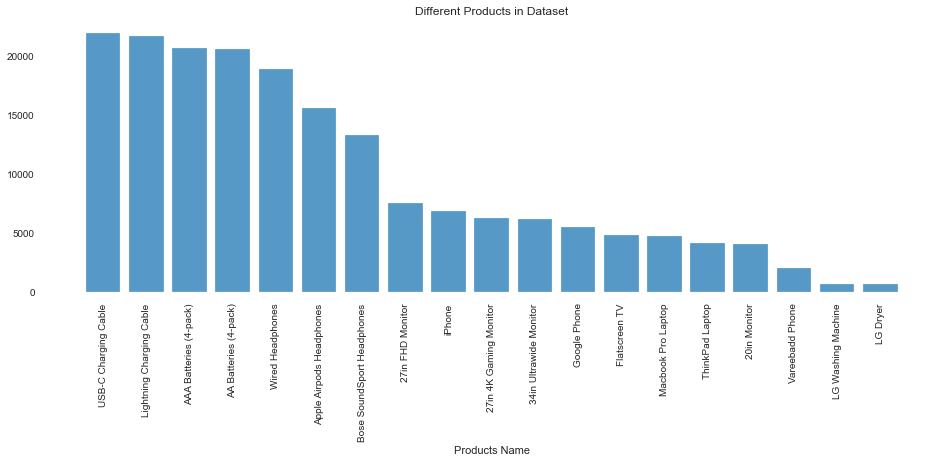

In [21]:
prd = df['Product'].value_counts()

def bar(x_value, y_value, x_label=None, y_label=None, Title=None, width=16, height=5, rotate=90):
    plt.figure(figsize=(width, height))
    plt.bar(x_value, y_value, alpha=0.75)
    plt.xticks(rotation=rotate)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()

bar(prd.index, prd.values, 'Products Name', '','Different Products in Dataset')

### What is the Quantity of Ordered for different product?

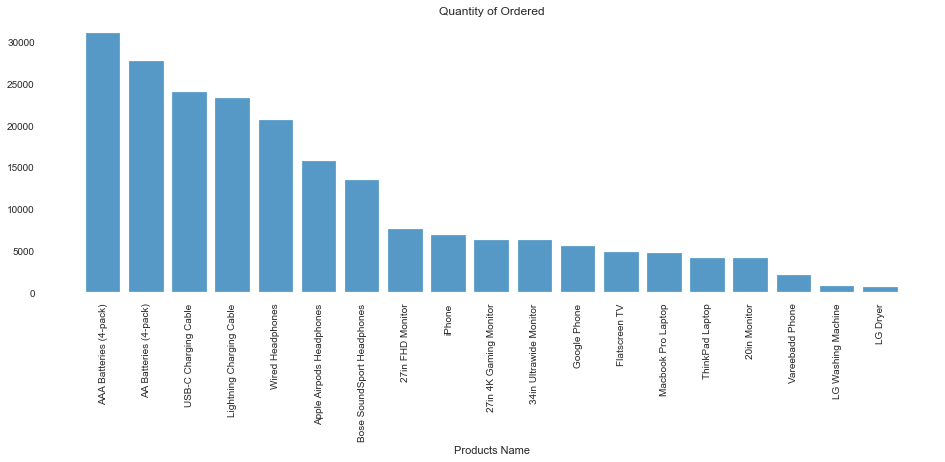

In [22]:
order = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

bar(order.index, order.values, 'Products Name', '','Quantity of Ordered')

### What is the Quantity of Ordered for different product?

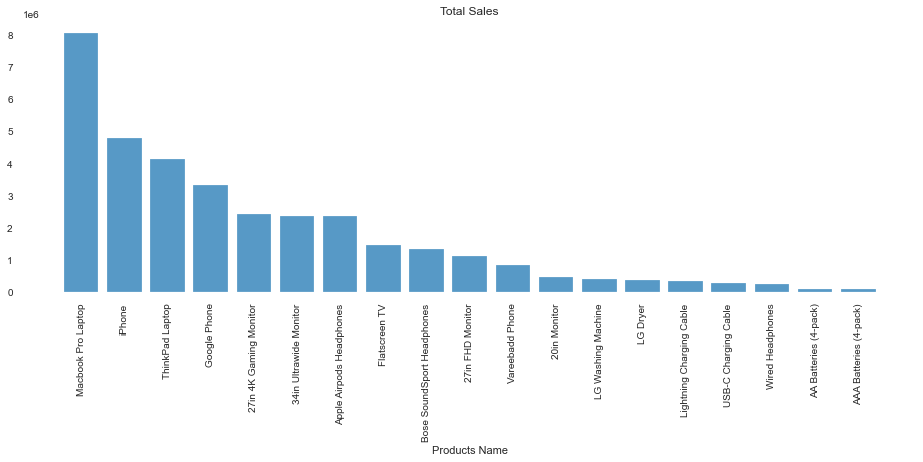

In [23]:
order_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
bar(order_sales.index, order_sales.values, 'Products Name', '','Total Sales')

### Sales made by Months.

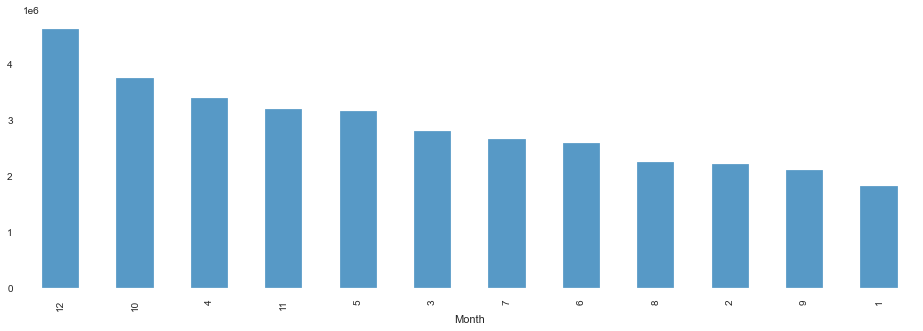

In [24]:
months = df.groupby('Month')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', alpha=0.75, figsize=(16,5))

### Sales made by States.

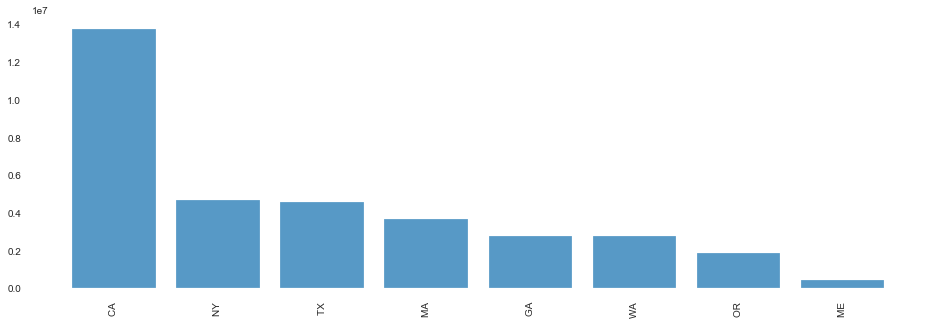

In [25]:
states = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
bar(states.index, states.values)

### Sales made on different cities.

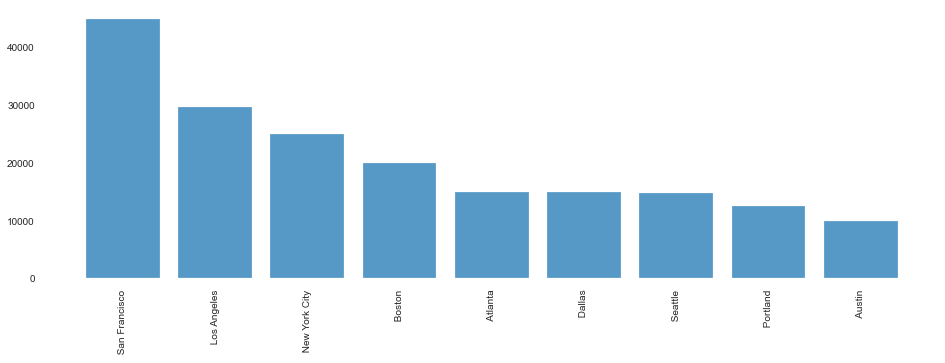

In [26]:
cities = df['City'].value_counts()
bar(cities.index, cities.values)

### Sales made during 24 hours.

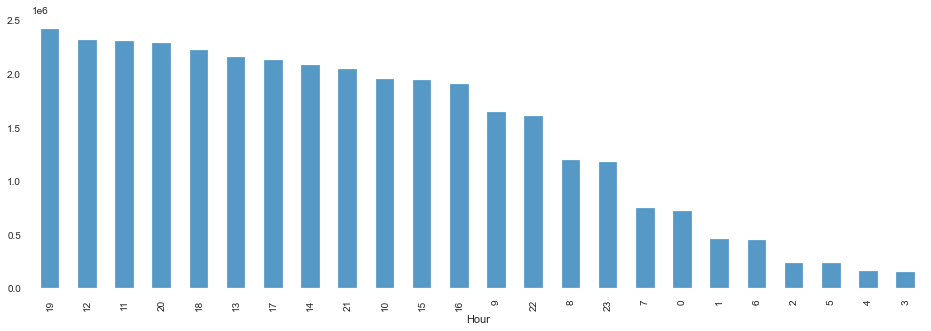

In [27]:
hours = df.groupby('Hour')['Sales'].sum().sort_values(ascending=False).plot(kind='bar',alpha=0.75, figsize=(16,5))


From above observation we can see that, 11-12 in a day and 18,19 and 20 in the evening where maximum sales has been made.

### Lets find What are the most common item ordered by States.

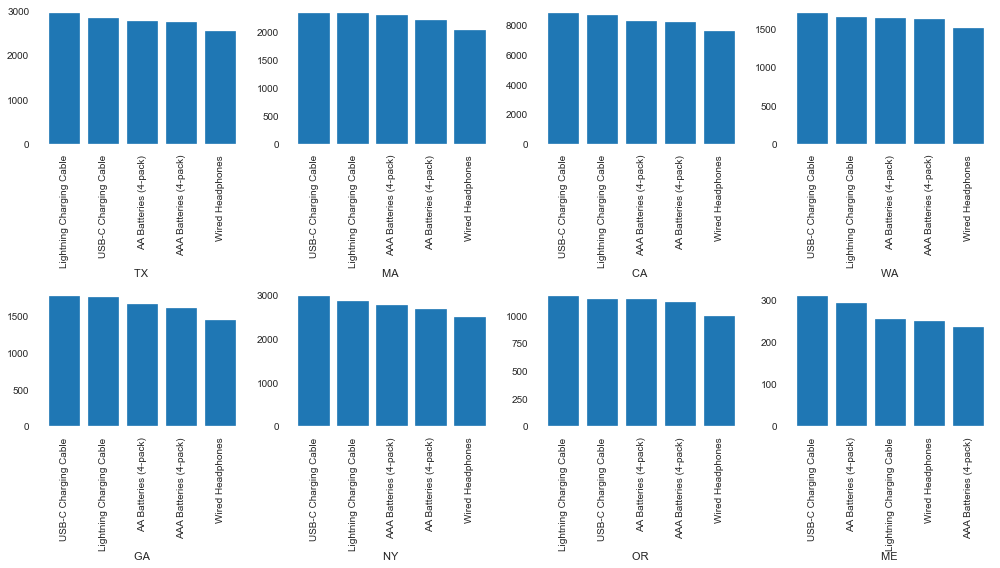

In [49]:
all_states =  df['State'].unique()
fig = plt.figure(figsize=(14,8))

for i in range(len(all_states)):
    result = df[df['State'].str.contains(all_states[i])]['Product'].value_counts().head()
    x_axis = result.index
    y_value = result.values
    ax = fig.add_subplot(2,4, i+1)
    ax.bar(x_axis,y_value)
    ax.set_xlabel(all_states[i], labelpad=1)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()